<div class="clearfix" style="padding: 10px; padding-left: 0px">
<img src="https://raw.githubusercontent.com/jupyter/nature-demo/master/images/jupyter-logo.png" width="150px" style="display: inline-block; margin-top: 5px;">
<a href="http://bit.ly/tmpnbdevrax"><img src="https://cloud.githubusercontent.com/assets/836375/4916141/2732892e-64d6-11e4-980f-11afcf03ca31.png" width="150px" class="pull-right" style="display: inline-block; margin: 0px;"></a>
</div>

## Welcome to the Temporary Notebook (tmpnb) service!

This Notebook Server was **launched just for you**. It's a temporary way for you to try out a recent development version of the IPython/Jupyter notebook.

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**WARNING**</p>

<p>Don't rely on this server for anything you want to last - your server will be *deleted after 10 minutes of inactivity*.</p>
</div>

Your server is hosted thanks to [Rackspace](http://bit.ly/tmpnbdevrax), on their on-demand bare metal servers, [OnMetal](http://bit.ly/onmetal).


### Run some Python code!

To run the code below:

1. Click on the cell to select it.
2. Press `SHIFT+ENTER` on your keyboard or press the play button (<button class='fa fa-play icon-play btn btn-xs btn-default'></button>) in the toolbar above.

A full tutorial for using the notebook interface is available [here](ipython_examples/Notebook/Index.ipynb).

<IPython.core.display.Javascript object>


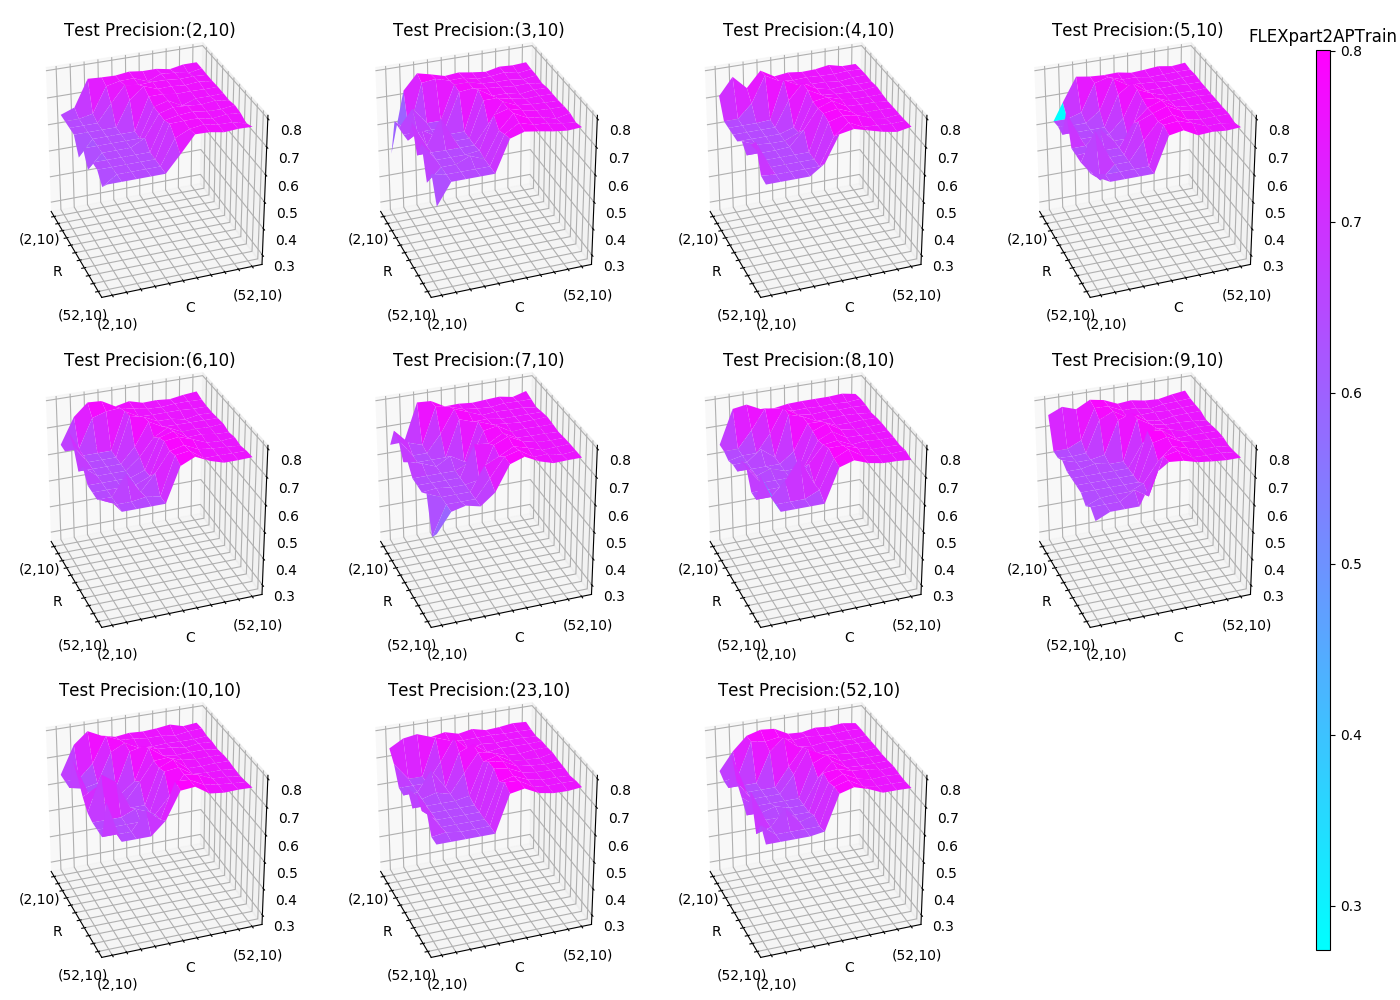

<IPython.core.display.Javascript object>


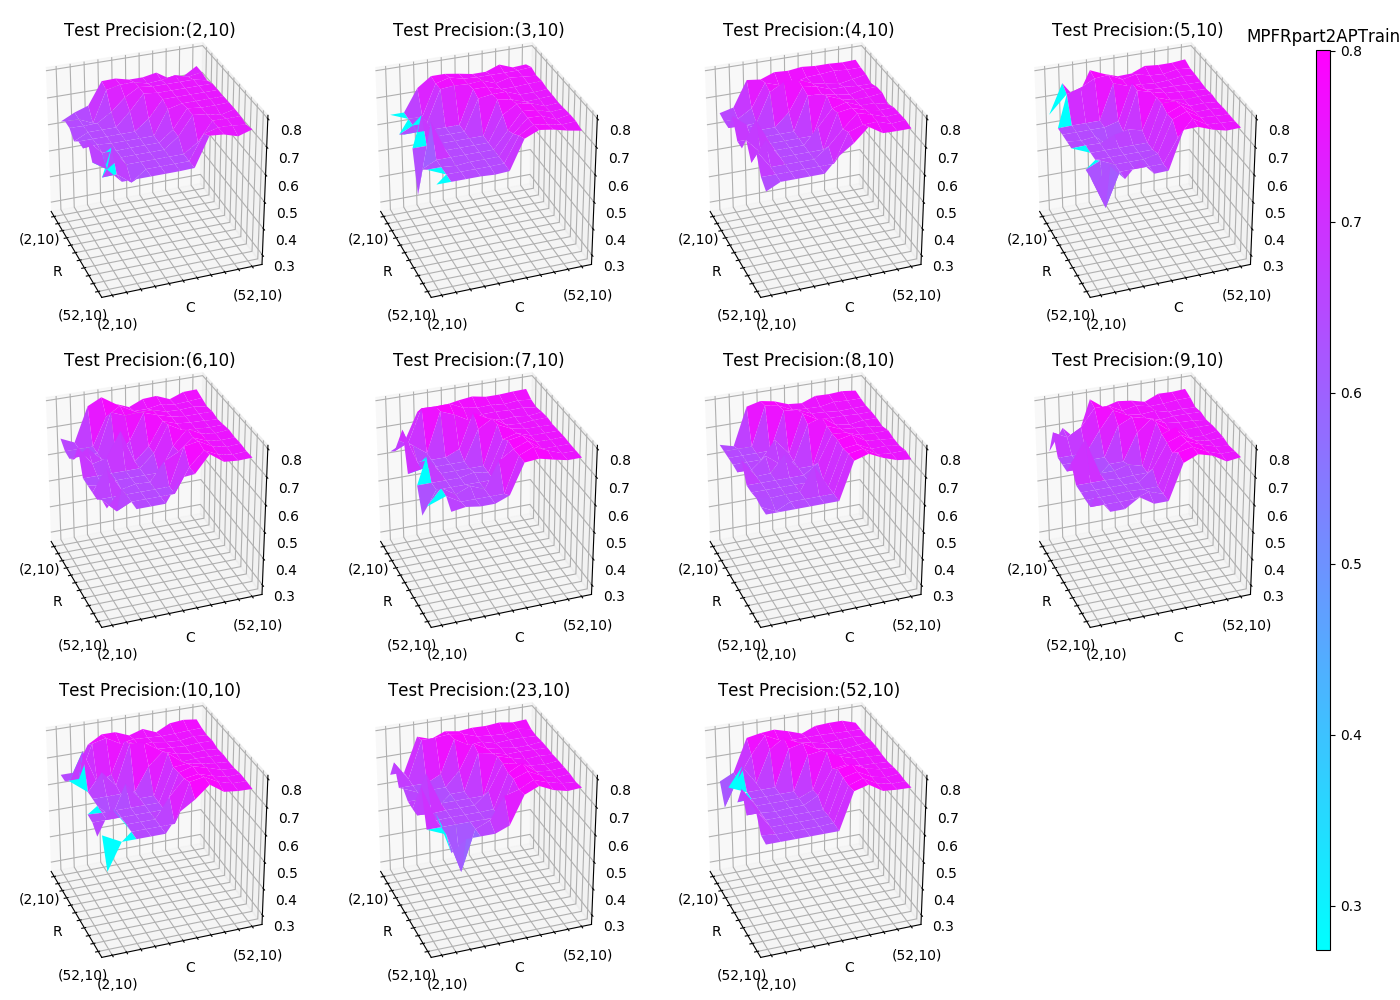

<IPython.core.display.Javascript object>


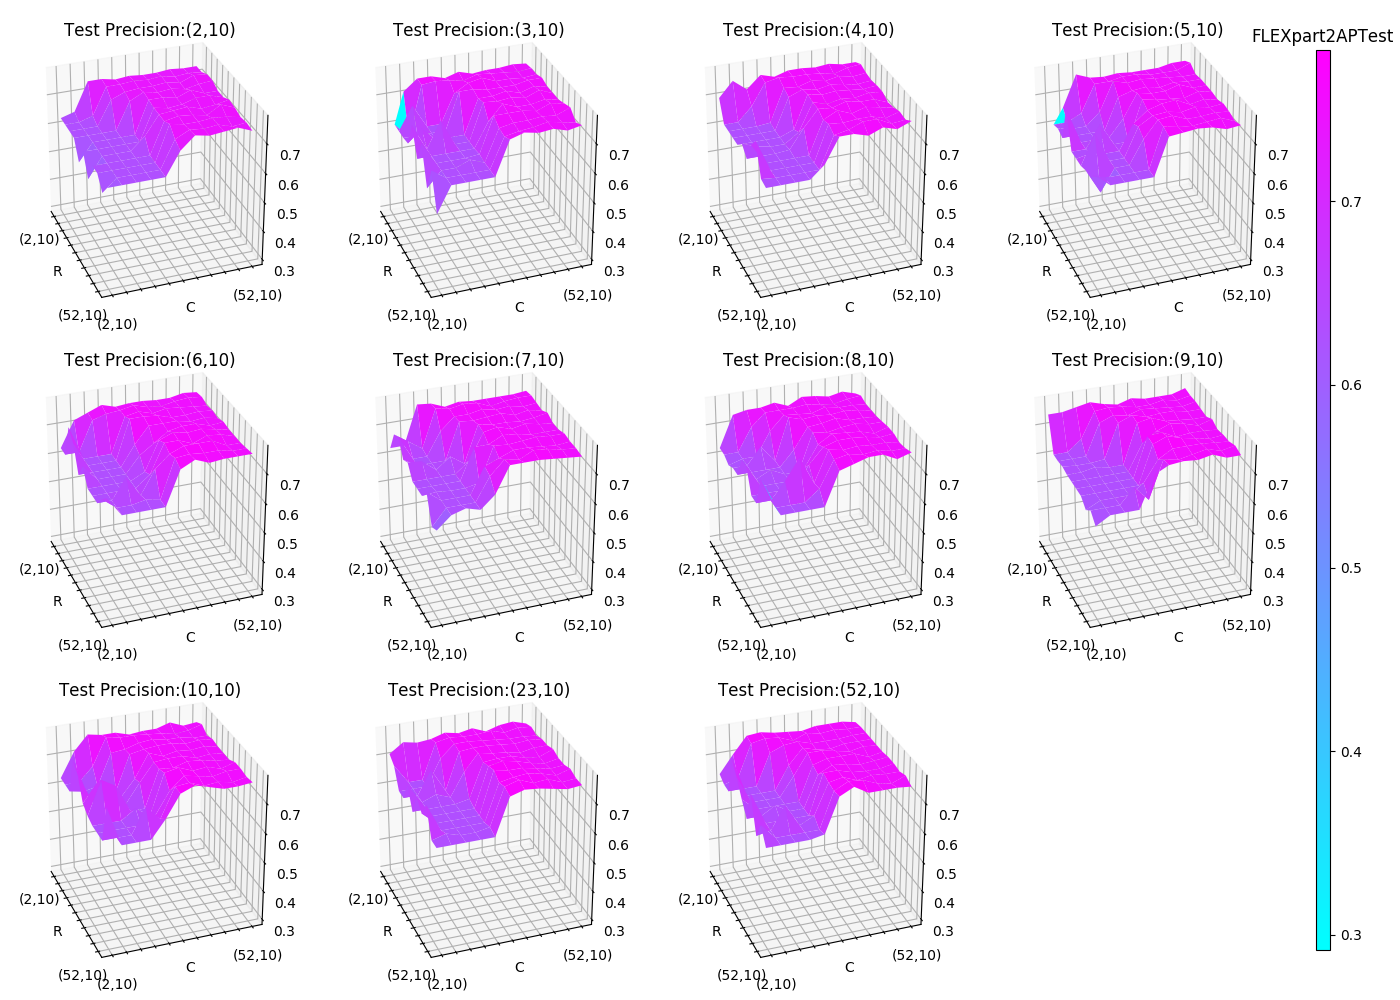

<IPython.core.display.Javascript object>


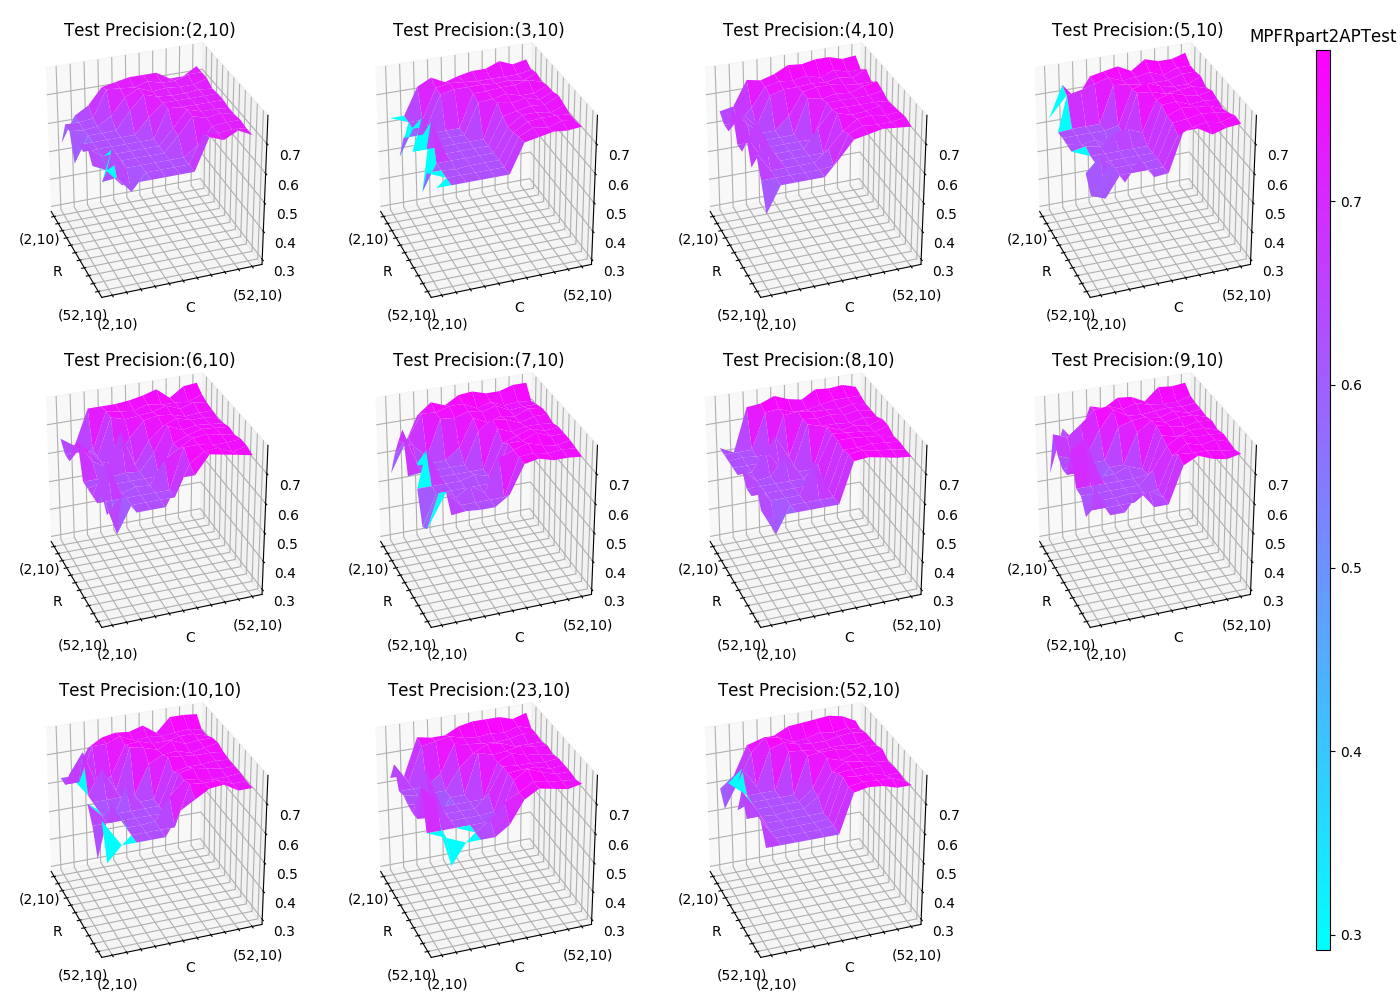

In [18]:
!pip install numpy
!pip install matplotlib
%matplotlib notebook
import numpy as np
import numpy.random
import matplotlib
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pickle
from matplotlib.pyplot import draw

matplotlib.rcParams.update({'font.size': 10})

def splitDotValue(column):
	values=column.split(":")
	return values[1]
	
def getAccuracy(val):
	acc=0
	try:
		acc=float(splitDotValue(val))/100.0
	except ValueError:
		acc=0
	return acc
	
data=[]

### Configuration ###
#Select between AP, SVM, P
#Select from 1 to 4
algoritmh="AP"
indexes=["2"]
folder=os.getcwd()+"/fourclassData/"
#####################

### Note: the script can save the graphs in the folder: /folder/GRAPHS/*. To do it just remove comment from line 124 'fig.savefig'

for tt in ["Train","Test"]:
	for indFile in indexes: 
		fileNames=[folder+"FLEX/part"+str(indFile)+algoritmh+tt+".txt", 
				   folder+"MPFR/part"+str(indFile)+algoritmh+tt+".txt"]
		maxi=0
		mini=1.0
		for fileName in fileNames:
			with open(fileName) as f:
				data=f.readlines()
			for line in data:
				columns=line.split("$")
				if getAccuracy(columns[6])>0:
					maxi=max(maxi,getAccuracy(columns[6]))
					mini=min(mini,getAccuracy(columns[6]))
		
		for fileName in fileNames:
			with open(fileName) as f:
				data=f.readlines()
			
			labelsComputation=[]
			labelsReading=[]
			labelsTest=[]
			
			for line in data:
				columns=line.split("$")
				if "exc" not in line:
					if columns[1]!="" and columns[1] not in labelsReading: 
						labelsReading.append(columns[1])
					if columns[2]!="" and columns[2] not in labelsComputation: 
						labelsComputation.append(columns[2])
					if columns[3]!="" and columns[3] not in labelsTest: 
						labelsTest.append(columns[3])
			
			matrix=numpy.zeros((len(labelsTest),len(labelsReading),len(labelsComputation)))
			
			for line in data:
				columns=line.split("$")
				if getAccuracy(columns[6])!=0:
					matrix[labelsTest.index(columns[3])][labelsReading.index(columns[1])][labelsComputation.index(columns[2])]=getAccuracy(columns[6])
			
			labelHiddenX=[0,len(labelsComputation)-1]
			labelHiddenY=[0,len(labelsReading)-1]
			
			for i,val in enumerate(labelsReading):
				if i not in labelHiddenX:
					labelsReading[i]=""
			
			for i,val in enumerate(labelsComputation): 
				if i not in labelHiddenY:
					labelsComputation[i]=""
			
			indexY=range(0,len(labelsReading),1)
			indexX=range(0,len(labelsComputation),1)
			indexZ=range(0,len(labelsTest),1)
			
			X, Y = np.meshgrid(indexX,indexY)
			fig = plt.figure(num=None, dpi=100, facecolor='w', edgecolor='k')
			fig.set_size_inches(14, 10)
			norm = matplotlib.colors.Normalize(vmin = mini, vmax = maxi, clip = False)
			plt.subplots_adjust(top = 0.98, bottom = 0.02, right = 0.92, left = 0, hspace = 0.1, wspace = 0.1)
		
			for i in range(0,len(labelsTest)):
				Z=matrix[i][:][:]
				Z[Z<0.5]=np.NaN #Used to remove accuracy values under 0.5
				ax = fig.add_subplot(3,4,i+1, projection='3d')
				ax.view_init(30,-20)
				ax.set_zlim(mini, maxi)
				ax.set_xticks(indexY)
				ax.set_xticklabels(labelsReading)
				ax.set_yticks(indexX)
				ax.set_yticklabels(labelsComputation)
				ax.set_title("Test Precision:"+str(labelsTest[i]))
				ax.set_xlabel("R")
				ax.xaxis.labelpad = -8
				ax.set_ylabel("C")
				ax.yaxis.labelpad = -8
				ax.tick_params(axis='both', which='major', pad=3)
				im=ax.plot_surface(Y, X, Z, cmap="cool", antialiased=True,norm=norm,alpha=1)
				
			cbar_ax = fig.add_axes([0.94, 0.05, 0.01, 0.9])
			cbar_ax.set_yticklabels(['< -1', '0', '> 1'])
			fig.colorbar(im,cax=cbar_ax)
			title=fileName.split("/")[-2]+fileName.split("/")[-1].split(".")[0]
			plt.title(title),
			fig.canvas.set_window_title(title)
			#manager = plt.get_current_fig_manager()
			#manager.resize(*manager.window.maxsize())
			draw()
			#fig.savefig(folder+"GRAPHS/"+algoritmh+"/"+title+".pdf") 
plt.show()

Feel free to open new cells using the plus button (<button class='fa fa-plus icon-plus btn btn-xs btn-default'></button>), or hitting shift-enter while this cell is selected.

Behind the scenes, the software that powers this is [tmpnb](https://github.com/jupyter/tmpnb), a  Tornado application that spawns [pre-built Docker containers](https://github.com/ipython/docker-notebook) and then uses the [jupyter/configurable-http-proxy](https://github.com/jupyter/configurable-http-proxy) to put your notebook server on a unique path.